In [1]:
%reload_ext autoreload
%autoreload 2

In [36]:
pip install mysql-connector-python==8.0.29

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import mysql.connector as cnt

# nuosavų funkcijų importavimas:
from Mano_Funkcijos import *

In [38]:
DB = cnt.connect(
    host='88.223.121.130',
    port=3306,
    user='user',
    password = 'slaptazodis',
    database = 'works'
)
C = DB.cursor()

In [13]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql=""" select count(*) as Kiekis, count(*)/(select count(*) from sa)*100 as `Rinkos dalis`,
case 
when device_brand in (select * from(select brand from
(select count(*) as kiekis, device_brand as brand  from sa where device_brand<>'' group by device_brand) as D
order by kiekis desc limit 5)as f) then device_brand
else 'Other'
end as Brand from sa
group by Brand
order by kiekis desc;"""
C.execute(sql)
ans = C.fetchall()
kiekis, dalis, gamintojai = list(map(list, zip(*ans)))
#? = np.transpose(ans)
pout(ans)

Rodoma 5 eilutės iš 6
| 0 |     36290      |    30.4927     |    Samsung     |
| 1 |     35186      |    29.5651     |     Nokia      |
| 2 |     31091      |    26.1243     |     Other      |
| 3 |      7161      |     6.0170     |   BlackBerry   |
| 4 |      5194      |     4.3643     |       LG       |


In [12]:
pout (ans)

| 0 |       F        |     22366      |2097.37965841008|
| 1 |       M        |     22586      |2633.69374391215|


In [10]:
print (gamintojai)

[36290, 35186, 31091, 7161, 5194, 4090]


In [11]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""
select lytis, count(*),
avg(bdu_spalio)
from DUS2014N
group by lytis;
"""
C.execute(sql)
ans = C.fetchall()
lytis, kiekis, atlyginimas = list(map(list, zip(*ans)))
#? = np.transpose(ans)

| 0 |     14-29      |      9362      |      9368      |      0.06      |     596.0      |     866.0      |     45.34      |
| 1 |     30-39      |      9747      |      9282      |     -4.77      |     791.0      |     1089.0     |      37.7      |
| 2 |     40-49      |     10947      |      9421      |     -13.94     |     696.0      |     981.0      |      40.9      |
| 3 |     50-59      |     10968      |     10056      |     -8.32      |     663.0      |     856.0      |     29.22      |
| 4 |      60+       |      3928      |      5037      |     28.23      |     623.0      |     785.0      |     25.96      |


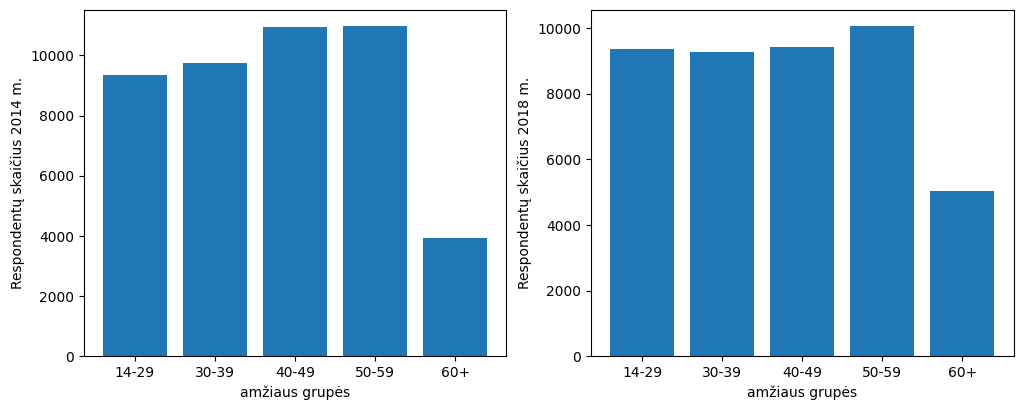

In [20]:
#sql užklausos vykdymas per mysql/mariadb kursorių
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
) AS combined
GROUP BY age_group;"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, axes = plt.subplots(1, 2, figsize=[12, 4.5])

# Pirmasis barų grafikas
axes[0].bar(age_group, respondent_count_2014)
axes[0].set_xlabel('amžiaus grupės')
axes[0].set_ylabel('Respondentų skaičius 2014 m.')

# Antrasis barų grafikas
axes[1].bar(age_group, respondent_count_2018)
axes[1].set_xlabel('amžiaus grupės')
axes[1].set_ylabel('Respondentų skaičius 2018 m.')

# Parodykite grafikus
plt.show()

| 0 |     14-29      |      4080      |      4291      |      5.17      |     545.0      |     778.0      |     42.59      |
| 1 |     30-39      |      4551      |      4118      |     -9.51      |     697.0      |     971.0      |     39.29      |
| 2 |     40-49      |      5879      |      4670      |     -20.56     |     606.0      |     888.0      |     46.55      |
| 3 |     50-59      |      5956      |      5186      |     -12.93     |     589.0      |     778.0      |     32.09      |
| 4 |      60+       |      1900      |      2423      |     27.53      |     544.0      |     702.0      |     29.07      |


Text(0, 0.5, 'Moteru alga 2018.')

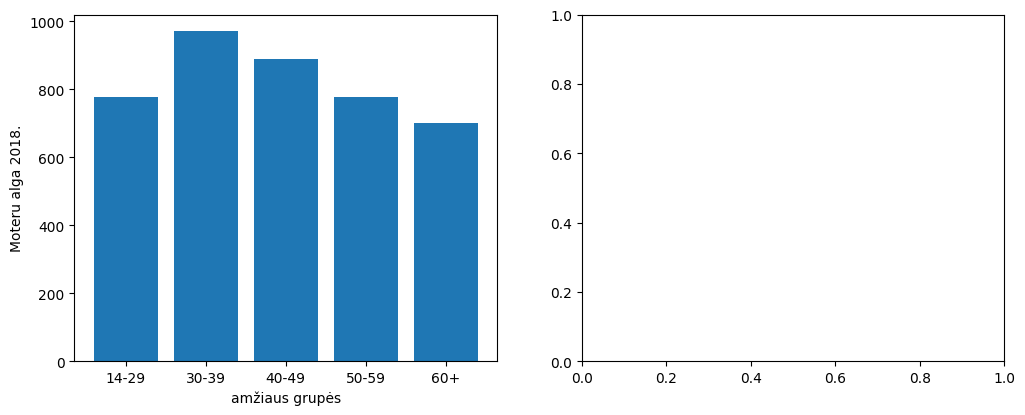

In [26]:
#2018 metams, parodykite vaizdžiai vidutinio atlyginimo priklausomybę 
#nuo amžiaus grupės, atskirai vyrams, atskirai moterims.
#sql užklausos vykdymas per mysql/mariadb kursorių

#Skaiciuoju moteru skaiciu ir ju vidutini atlyginima
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    WHERE lytis = 'F'
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
    WHERE lytis = 'F'
) AS combined
GROUP BY age_group"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
#fig, axes = plt.subplots(1, 2, figsize=[12, 4.5])

# Pirmasis barų grafikas
#axes[0].bar(age_group, alga_2018)
#axes[0].set_xlabel('amžiaus grupės')
#axes[0].set_ylabel('Moteru alga 2018.')


| 0 |     14-29      |      5282      |      5077      |     -3.88      |     634.0      |     940.0      |     48.18      |
| 1 |     30-39      |      5196      |      5164      |     -0.62      |     873.0      |     1183.0     |     35.53      |
| 2 |     40-49      |      5068      |      4751      |     -6.25      |     801.0      |     1072.0     |     33.88      |
| 3 |     50-59      |      5012      |      4870      |     -2.83      |     750.0      |     939.0      |     25.25      |
| 4 |      60+       |      2028      |      2614      |     28.90      |     697.0      |     861.0      |     23.57      |


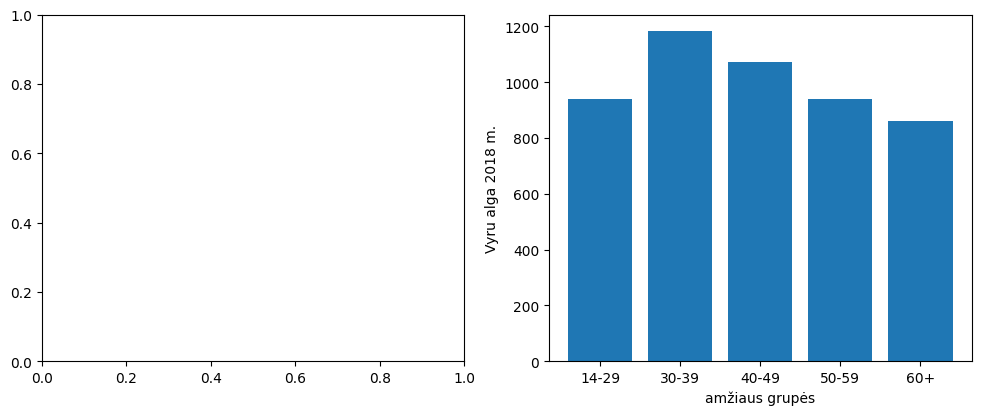

In [31]:
#Skaiciuoju vyru skaiciu ir ju vidutini atlyginima
sql="""SELECT 
    amzius AS age_group,
    COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END) AS respondent_count_2014,
    COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) AS respondent_count_2018,
    ROUND(
        (COUNT(CASE WHEN metai = 2018 THEN amzius ELSE NULL END) - COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END)) /
        NULLIF(COUNT(CASE WHEN metai = 2014 THEN amzius ELSE NULL END), 0) * 100, 
        2
    ) AS respondentu_procentinis_pokytis,
    ROUND(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END)/3.475, 0) AS Alga_2014,
    ROUND(AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END), 0) AS Alga_2018,
    ROUND(
        (AVG(CASE WHEN metai = 2018 THEN alga ELSE NULL END) - AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475) /
        NULLIF(AVG(CASE WHEN metai = 2014 THEN alga ELSE NULL END) / 3.475, 0) * 100,
        2
    ) AS algos_procentinis_pokytis
FROM (
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2014 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2014N
    WHERE lytis = 'M'
    UNION ALL
    SELECT 
        CASE 
            WHEN amzius BETWEEN 14 AND 29 THEN '14-29'
            ELSE amzius 
        END AS amzius,
        2018 AS metai, 
        bdu_spalio AS alga 
    FROM DUS2018N
    WHERE lytis = 'M'
) AS combined
GROUP BY age_group"""
C.execute(sql)
ans = C.fetchall()
age_group, respondent_count_2014, respondent_count_2018, respondentu_procentinis_pokytis, alga_2014, alga_2018, algos_procentinis_pokytis = list(map(list, zip(*ans)))
#apsiriboju, kad butu isvesti tik trys stulpeliai
#age_group, respondent_count_2014, respondent_count_2018 = zip(*[(row[0], row[1], row[2]) for row in ans])

#? = np.transpose(ans)
pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, axes = plt.subplots(1, 2, figsize=[12, 4.5])

# Pirmasis barų grafikas
#axes[0].bar(age_group, alga_2018)
#axes[0].set_xlabel('amžiaus grupės')
#axes[0].set_ylabel('Moteru alga 2018 m.')

# Antrasis barų grafikas
axes[1].bar(age_group, alga_2018)
axes[1].set_xlabel('amžiaus grupės')
axes[1].set_ylabel('Vyru alga 2018 m.')

# Parodykite grafikus
plt.show()

| 0 |      Audi      |   241375.73    |    8447.67     |     16.77      |
| 1 |      BMW       |   260654.43    |    10652.14    |     15.22      |
| 2 | Mercedes-Benz  |   261259.21    |    15080.28    |     15.19      |
| 3 |     Toyota     |   201755.30    |    8712.73     |     14.60      |
| 4 |   Volkswagen   |   237650.65    |    6190.71     |     15.79      |


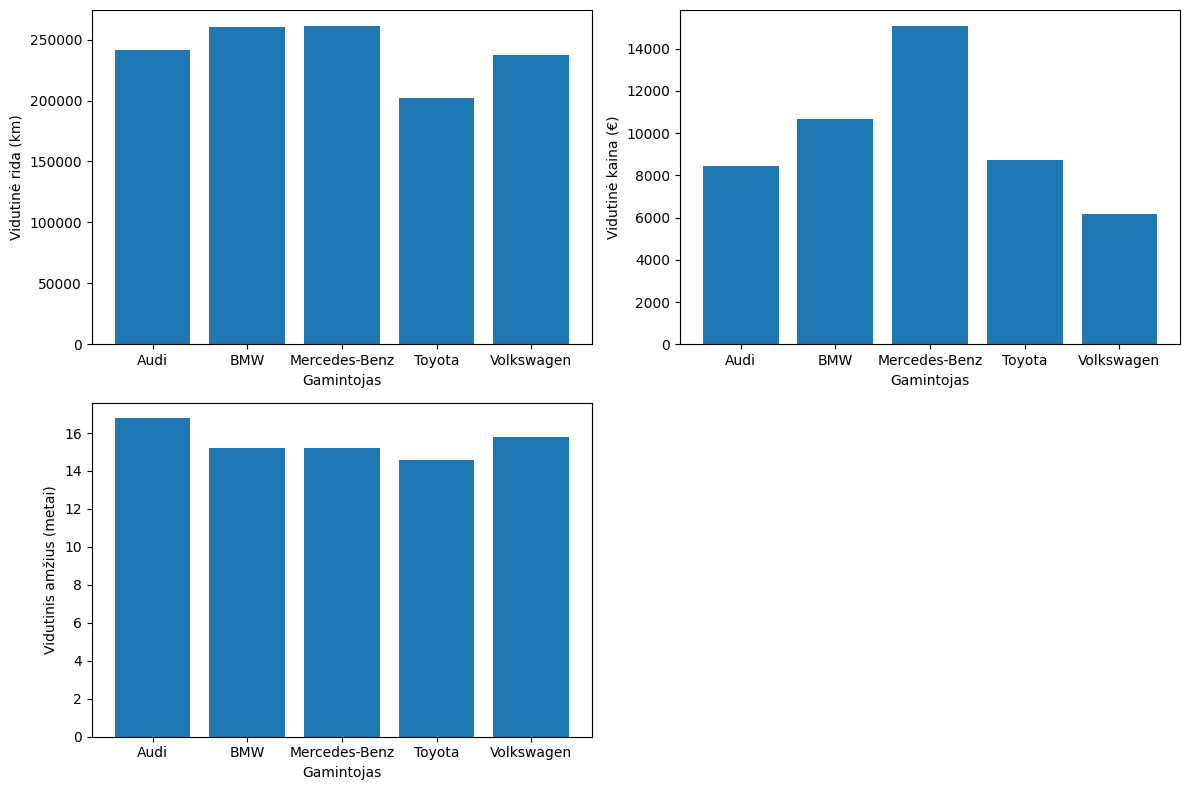

In [40]:
# Raskite 5-kis populiariausius autopliuslt skelbimuose  
# esančius gamintojus, suraskite, kokia buvo kiekvienam  
# iš šių gamintojų automobilių vidutinė kaina, rida,  
# automobilių amžius. (viena kompleksinė SQL užklausa)
# vizualizuokite šią informaciją stulpeline ar kitokia diagrama

import matplotlib.pyplot as plt

# SQL užklausa
sql = """
SELECT 
    t5.gamintojas,
    ROUND(AVG(CAST(REPLACE(ap.rida, ' ', '') AS DECIMAL)), 2) AS vidutine_rida_km,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur,
    ROUND(AVG(2024 - CAST(LEFT(ap.pagaminimo_data, 4) AS INT)), 2) AS vidutinis_amzius_metais
FROM 
    (SELECT 
        gamintojas, 
        COUNT(*) AS skelbimu_skaicius
     FROM 
        autopliuslt
     GROUP BY 
        gamintojas
     ORDER BY 
        skelbimu_skaicius DESC
     LIMIT 5) AS t5
JOIN 
    autopliuslt ap ON t5.gamintojas = ap.gamintojas
GROUP BY 
    t5.gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Išpakavimas
gamintojas, vidutine_rida_km, vidutine_kaina_Eur, vidutinis_amzius_metais = list(map(list, zip(*ans)))

pout(ans)
# Vizualizavimas
fig, axes = plt.subplots(2, 2, figsize=[12, 8])

# Pirmasis barų grafikas
axes[0, 0].bar(gamintojas, vidutine_rida_km)
axes[0, 0].set_xlabel('Gamintojas')
axes[0, 0].set_ylabel('Vidutinė rida (km)')

# Antrasis barų grafikas
axes[0, 1].bar(gamintojas, vidutine_kaina_Eur)
axes[0, 1].set_xlabel('Gamintojas')
axes[0, 1].set_ylabel('Vidutinė kaina (€)')

# Trečiasis barų grafikas
axes[1, 0].bar(gamintojas, vidutinis_amzius_metais)
axes[1, 0].set_xlabel('Gamintojas')
axes[1, 0].set_ylabel('Vidutinis amžius (metai)')

# Pašalinkite tuščią subplot (4-asis)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

| 0 |      Audi      |   252499.04    |    8786.73     |     16.35      |
| 1 |      BMW       |   263542.57    |    10720.86    |     15.20      |
| 2 | Mercedes-Benz  |   265763.68    |    15295.47    |     15.11      |
| 3 |     Toyota     |   211362.69    |    8582.15     |     14.53      |
| 4 |   Volkswagen   |   246393.66    |    6358.27     |     15.59      |


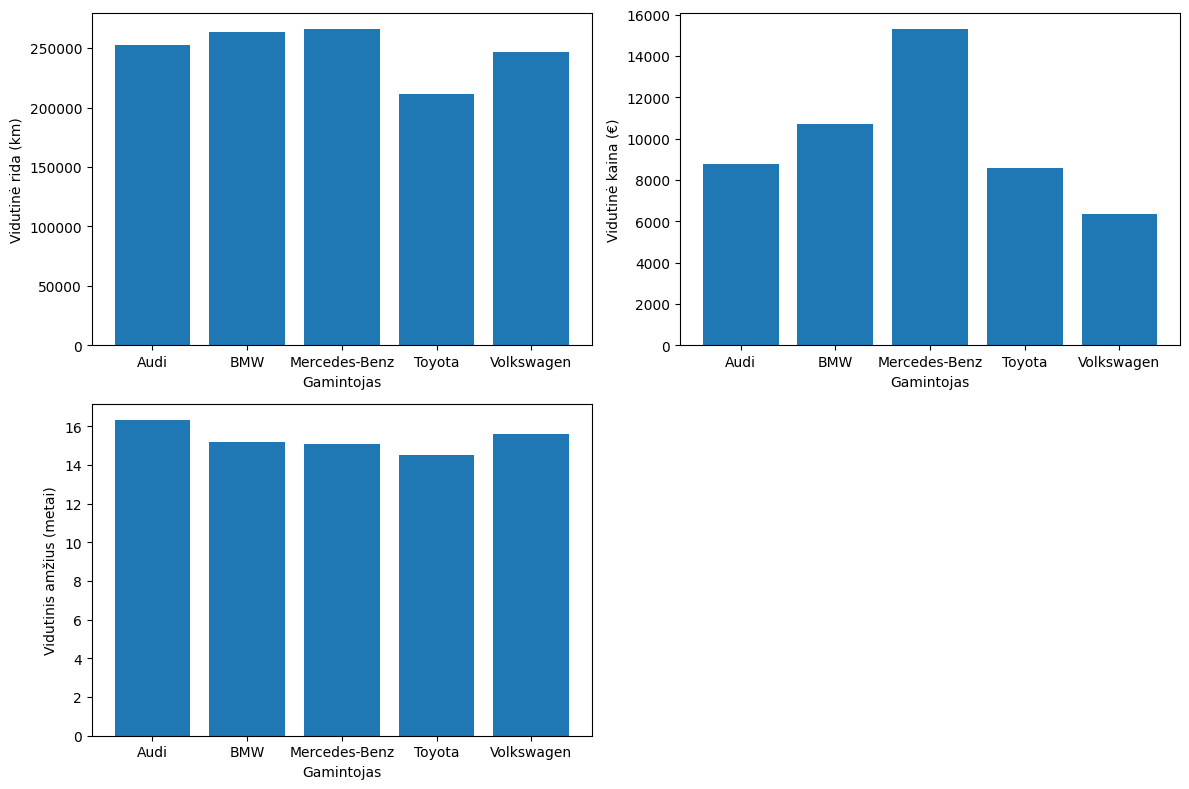

In [45]:
# Raskite 5-kis populiariausius autopliuslt skelbimuose  
# esančius gamintojus, suraskite, kokia buvo kiekvienam  
# iš šių gamintojų automobilių vidutinė kaina, rida,  
# automobilių amžius. (viena kompleksinė SQL užklausa)
# vizualizuokite šią informaciją stulpeline ar kitokia diagrama
# Atmesti tie duomenys, kai rida nera nurodyta

import matplotlib.pyplot as plt

# SQL užklausa
sql = """
SELECT 
    t5.gamintojas,
    ROUND(AVG(CAST(REPLACE(ap.rida, ' ', '') AS DECIMAL)), 2) AS vidutine_rida_km,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur,
    ROUND(AVG(2024 - CAST(LEFT(ap.pagaminimo_data, 4) AS INT)), 2) AS vidutinis_amzius_metais
FROM 
    (SELECT 
        gamintojas, 
        COUNT(*) AS skelbimu_skaicius
     FROM 
        autopliuslt
     GROUP BY 
        gamintojas
     ORDER BY 
        skelbimu_skaicius DESC
     LIMIT 5) AS t5
JOIN 
    autopliuslt ap ON t5.gamintojas = ap.gamintojas
    WHERE 
    TRIM(ap.rida) <> 'nenurodyta' 
GROUP BY 
    t5.gamintojas;
"""
C.execute(sql)
ans = C.fetchall()

# Išpakavimas
gamintojas, vidutine_rida_km, vidutine_kaina_Eur, vidutinis_amzius_metais = list(map(list, zip(*ans)))

pout(ans)
# Vizualizavimas
fig, axes = plt.subplots(2, 2, figsize=[12, 8])

# Pirmasis barų grafikas
axes[0, 0].bar(gamintojas, vidutine_rida_km)
axes[0, 0].set_xlabel('Gamintojas')
axes[0, 0].set_ylabel('Vidutinė rida (km)')

# Antrasis barų grafikas
axes[0, 1].bar(gamintojas, vidutine_kaina_Eur)
axes[0, 1].set_xlabel('Gamintojas')
axes[0, 1].set_ylabel('Vidutinė kaina (€)')

# Trečiasis barų grafikas
axes[1, 0].bar(gamintojas, vidutinis_amzius_metais)
axes[1, 0].set_xlabel('Gamintojas')
axes[1, 0].set_ylabel('Vidutinis amžius (metai)')

# Pašalinkite tuščią subplot (4-asis)
fig.delaxes(axes[1, 1])

plt.tight_layout()
plt.show()

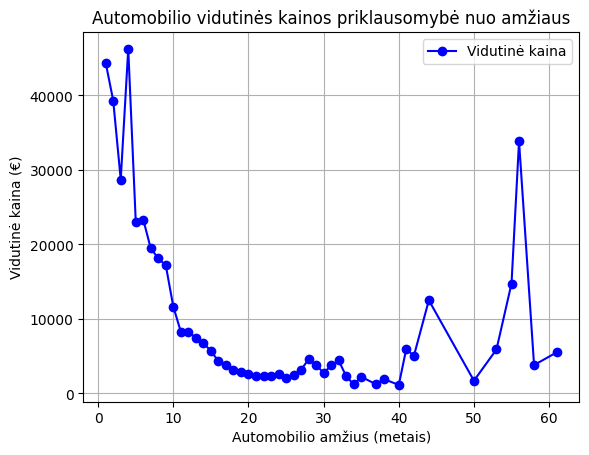

In [61]:
# Sugrupuokite automobilius pagal jų amžių, ir suraskite
# vidutinę kainą kiekvienam amžiui.Ar didėjant automobilių amžiui, jų kaina yra linkusi mažėti? -(NE. Pradeda dideti)
# -- Pateikite vizualizaciją, atsakančią į pateiktą klausimą.-
sql="""SELECT 
    ROUND(2024 - CAST(LEFT(pagaminimo_data, 4) AS INT), 2) AS amzius_metais,
    ROUND(AVG(CAST(REPLACE(price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur
FROM 
    autopliuslt
GROUP BY 
    amzius_metais
ORDER BY 
    amzius_metais DESC;"""
C.execute(sql)
ans = C.fetchall()
amzius, vidutine_kaina_Eur = list(map(list, zip(*ans)))

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais

plt.plot(amzius, vidutine_kaina_Eur,marker='o', linestyle='-', color='b', label='Vidutinė kaina')

# Pridėkite grafiko elementus
plt.xlabel('Automobilio amžius (metais)')
plt.ylabel('Vidutinė kaina (€)')
plt.title('Automobilio vidutinės kainos priklausomybė nuo amžiaus')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()

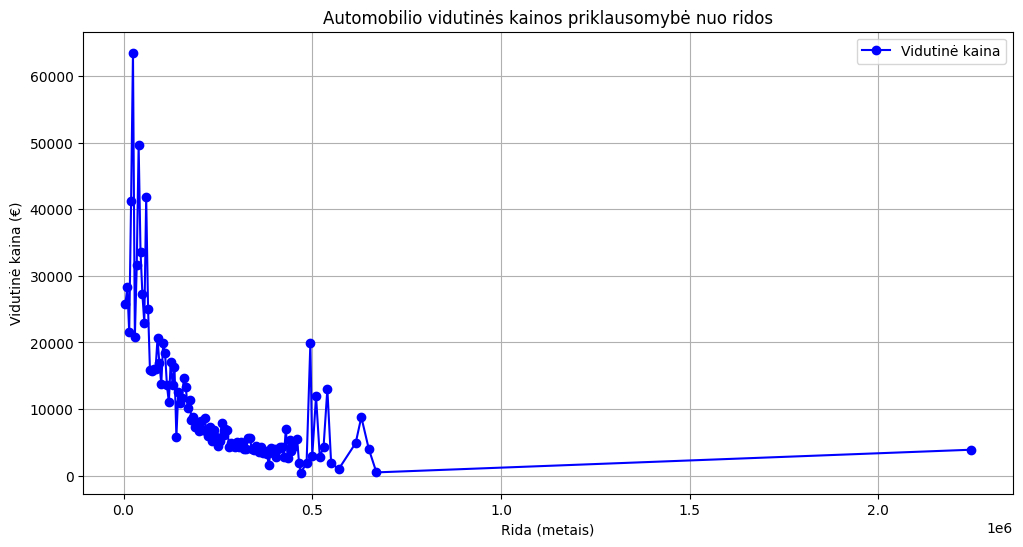

In [64]:
# Sugrupuokite automobilius pagal ridą, intervalais kas 5000 km, ir suraskite vidutinę kainą
# kiekviename intervale. 
# Ar didėjant ridai, automobilių kaina yra linkusi mažėti?
# Pateikite vizualizaciją, atsakančią į pateiktą klausimą.50

sql="""SELECT 
    CEIL(CAST(REPLACE(REPLACE(rida, ' ', ''), 'km', '') AS DECIMAL) / 5000) * 5000 AS rida_intervalas,
    COUNT(*) AS automobiliu_skaicius,
    ROUND(AVG(CAST(REPLACE(ap.price, ' ', '') AS DECIMAL)), 2) AS vidutine_kaina_Eur
FROM 
    autopliuslt ap
WHERE 
    rida <> 'nenurodyta'
GROUP BY 
    rida_intervalas
ORDER BY 
    rida_intervalas;
"""
C.execute(sql)
ans = C.fetchall()
rida_intervalas, automobiliu_skaicius, vidutine_kaina_Eur = list(map(list, zip(*ans)))

#? = np.transpose(ans)
#pout(ans)
# Sukurkite subplots su 1 eilute ir 2 stulpeliais
fig, ax = plt.subplots(figsize=(12, 6)) 
plt.plot(rida_intervalas, vidutine_kaina_Eur,marker='o', linestyle='-', color='b', label='Vidutinė kaina')

# Pridėkite grafiko elementus
plt.xlabel('Rida (metais)')
plt.ylabel('Vidutinė kaina (€)')
plt.title('Automobilio vidutinės kainos priklausomybė nuo ridos')
plt.legend()

# Parodykite grafiką
plt.grid(True)
plt.show()